## Теоретические вопросы (2 балла)

** Задача 1** <br>
Покажите, что ROC-AUC  в случае, когда классификатор даёт случайные ответы $a(x) = 1$ с вероятностью $p$ и $a(x) = 0$ с вероятностью $1 − p$, будет в среднем равен 0.5 независимо от p и доли класса 1 в обучающей выборке. <br>
**Решение:** <br>




In [2]:
import numpy as np
import scipy
import pandas as pd

Для наглядности нарисуем табличку

In [3]:
frame = pd.DataFrame()
frame['number of object'] = ['probability', 'true label']
frame['1'] = ['p', '$y_1$']
frame['2'] = ['p', '$y_2$']
frame['3'] = ['p', '$y_3$']
frame['4'] = ['p', '$y_4$']
frame['5'] = ['p', '$y_5$']
frame['6'] = ['p', '$y_6$']
frame

,number of object,1,2,3,4,5,6
0,probability,p,p,p,p,p,p
1,true label,$y_1$,$y_2$,$y_3$,$y_4$,$y_5$,$y_6$


Для построения ROC-кривой сначала возьмем порог > p. При таком пороге все объекты будут определены в класс 0. Тогда $FP = 0, TP = 0 \; \Rightarrow FPR = \frac{FP}{FP + TN} = 0 \;\; , TPR = \frac{TP}{TP + FN} = 0$. То есть получим точку (0, 0). <br>
Следующим порогом будет некоторый порог < p. При таком пороге все объекты будут отнесены к классу 1. Тогда $TN = 0, FN = 0 \; \Rightarrow FPR = \frac{FP}{FP + TN} = 1 \;\; , TPR = \frac{TP}{TP + FN} = 1$. То есть получим точку (1, 1). <br>
В итоге площадь под ROC-кривой - AUC-ROC = $\frac{1}{2}$ <br>
Получили ответ не зависящий от p, а также о баланса классов. <br>
На самом деле, AUC-ROC в любом случае(в случае более сложных классификаторов) не зависит от баланса классов в силу того, что FP делится на размер нулевого(негативного) класса, а TP на размер положительного.

** Задача 2** <br>
Покажите, что с ростом размерности пространства признаков при равномерном распределении точек в кубе $[0; 1]^𝑑$ вероятность попасть в куб $[0; 0, 99]^𝑑$ стремится к нулю. Это одна из иллюстраций проклятия размерностей (dimension curse). Попробуйте придумать или найти еще какую-нибудь иллюстрацию к этому явлению и кратко изложить. <br>
**Решение:**

Пусть у нас есть куб с размером ребра A, а внутри него куб с размером ребра a (a < A). Тогда вероятность попасть в маленький куб - это отношение объемов маленького и большого кубов, то есть P(точка попала в маленький куб) = $\frac{a^d}{A^d} = (\frac{0.99}{1})^d = 0.99^d \rightarrow 0$ при $d \rightarrow 0$ (где d как раз является размерностью пр-ва признаков). <br>
То есть с ростом числа признаков нам нужно экспоненциально больше данных.<br>
Другой иллюстрацией этой же проблемы может служить поиск по сетке. При увеличении размерности число операций, которые нужно выполнить(перебор узлов), растет экспоненциально. <br> <br>
(В проклятие размерности входит сразу несколько проблем. Неясно, просят ли от нас их описывать или нет. Я, на всякий случай, опишу)<br>
- Также еще одна проблема, появляющаяся при больших d в kNN, это то что расстояние от вектора признаков $(x_1, x_2, ..., x_i, ..., x_d)$ до векторов $(x_1, x_2, ..., x_i + A, ..., x_d)$ и $(x_1 + \epsilon, x_2 + \epsilon, ..., x_i + \epsilon, ..., x_d + \epsilon)$ при некоторых $\epsilon$ и A могут совпадать. В такой ситуации оба последних вектора будут эквивалентны друг другу (равноудалены от первого). Хоть вектор $(x_1 + \epsilon, x_2 + \epsilon, ..., x_i + \epsilon, ..., x_d + \epsilon)$ может совсем незначительно отличаться от первого, в силу большой размерности, $\epsilon$ могут накопиться и расстояние получится большим. В некоторых задачах такого не нужно. <br>
- Еще одной проблемой является то, что в d-мерном пространстве можно найти d+1 точку равноудаленную друг от друга(d-мерный симлекс). Тогда если в нашей задаче кол-во признаков сравнимо с количеством объектов, то может получиться так, что наши объекты в признаковом пространстве могут оказаться равноудаленными (или хотя бы почти равноудаленными) друг от друга. В данном случае эти объекты не получится сгрупировать в какой-то одной области, отвечающей определенному классу.


 ## Практическая часть

## Задача 1

## Исследуйте зависимость Bias-Variance для kNN (3 балла)
Используя данные из задачи классификации доходов индивидуума http://archive.ics.uci.edu/ml/machine-learning-databases/adult, постройте зависимость величин bias, variance и noise для следующих пар "модель|параметр"
Предобработка данных (преобразование признаков, разметка классов) определяется вами. <br>

- kNN, $n_{neigbours}$ - число соседей при классификации;
- $p$ - степень метрики Минковского;
- $\ell_{train}$ - длина обучающий выборки;

По каждому построенному графику (для каждого параметра должен быть отдельный график) объясните полученную картину. Совпадает ли она с теоретическими ожиданиями (см. семинар 2)?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
%matplotlib inline

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Скачаем данные и посмотрим на них

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')
df.columns = columns.split()
df.head(10)

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Видим, что у нас есть несколько категориальных признаков. Для работы с ними будем использовать one hot encoding, то есть для каждого категориального признака создадим несколько бинарных. Для этого сначала преобразуем текстовые признаки в числа, а уже потом применим  one hot encoding.

In [167]:
#определяем индексы категориальных признаков
indeces = np.array([1, 3, 5, 6, 7, 8, 9, 13, 14])
data = np.array(df)

int_encoder = LabelEncoder()
for ind in indeces:
    df[df.columns[ind]] = int_encoder.fit_transform(df[df.columns[ind]])

data = np.array(df)
bin_encoder = OneHotEncoder()
category_data = bin_encoder.fit_transform(data[:,indeces]).toarray()
non_category_data = data[:, [0, 2, 4, 10, 11, 12]]

data = np.hstack((category_data, non_category_data))

Посмотрим, что получили

In [168]:
pd.DataFrame(data).head(10)

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,39.0,77516.0,13.0,2174.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,50.0,83311.0,13.0,0.0,0.0,13.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,38.0,215646.0,9.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,53.0,234721.0,7.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,28.0,338409.0,13.0,0.0,0.0,40.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,37.0,284582.0,14.0,0.0,0.0,40.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,49.0,160187.0,5.0,0.0,0.0,16.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,52.0,209642.0,9.0,0.0,0.0,45.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,31.0,45781.0,14.0,14084.0,0.0,50.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,42.0,159449.0,13.0,5178.0,0.0,40.0


Как видим признаков стало значительно больше. <br>
Для выполнения этого задания уберем категориальные признаки, с ними работает слишком уж долго. <br>
Категориальные признаки нам понадобяться чуть позже, во втором задании.


In [169]:
small_data = data[:,103:]
pd.DataFrame(small_data).head(10)

,0,1,2,3,4,5,6
0,0.0,39.0,77516.0,13.0,2174.0,0.0,40.0
1,0.0,50.0,83311.0,13.0,0.0,0.0,13.0
2,0.0,38.0,215646.0,9.0,0.0,0.0,40.0
3,0.0,53.0,234721.0,7.0,0.0,0.0,40.0
4,0.0,28.0,338409.0,13.0,0.0,0.0,40.0
5,0.0,37.0,284582.0,14.0,0.0,0.0,40.0
6,0.0,49.0,160187.0,5.0,0.0,0.0,16.0
7,1.0,52.0,209642.0,9.0,0.0,0.0,45.0
8,1.0,31.0,45781.0,14.0,14084.0,0.0,50.0
9,1.0,42.0,159449.0,13.0,5178.0,0.0,40.0


С полученным датасетом и будем работать в этом задании.

In [87]:
# Settings
n_repeat = 100       # Number of iterations for computing expectations
test_size = 0.5       # (Relative) Size of the test set
# Исследуемая сетка параметров
# пояснение: длина train выборки должна варьироваться от 50% до 200% относительно длины тестовой выборки  
parameters = {"k": range(1, 20), "p":  np.arange(1, 10, 0.5), "l_train": np.arange(0.5, 2, 0.1)}

# Get Data
train , test = train_test_split(small_data, test_size=test_size, random_state=0)
X_test = test[:,1:]
y_test = test[:, 0]
n_test = X_test.shape[0]

# Для того чтобы оценить bias и variance, нужно сгенерировать случайные подвыборки с возвращением из исходного массива данных 
# (бутстрепинг)
X_train = []
y_train = []
for i in range(n_repeat):
    indeces =  np.random.choice(np.arange(len(train)), size=len(train), replace=True)
    sample_train = train[indeces]
    X = sample_train[:,1:]
    y = sample_train[:,0]
    X_train.append(X)
    y_train.append(y)

**Для различного параметра p**

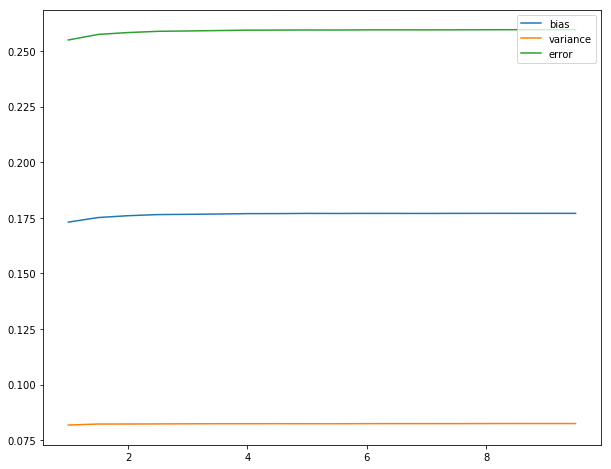

In [88]:
# Для каждого значения парамера оцените значение error, bias и variance согласно следующей схеме
p_name ='p'
bias_variance_df = pd.DataFrame.from_dict({p_name:parameters[p_name],'bias':list([np.NaN]*len(parameters[p_name]))
                                           , 'variance':list([np.NaN]*len(parameters[p_name]))
                                           , 'error':list([np.NaN]*len(parameters[p_name]))})
for parameter in parameters[p_name]:
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))
    
    for i in range(n_repeat):
        estimator = KNeighborsClassifier(p=parameter)
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.mean((y_test.reshape(y_test.shape[0], 1) - y_predict)**2, axis=1)


    # В каждой точке тестовой выборки bias положим равным квадрату разности реального значения 
    # и среднего предсказанного значения по всем обучающим выборкам.
    y_bias = (y_test - np.mean(y_predict, axis=1)) ** 2
    
    # Variance положим равным среднеквадратичному разбросу значений по всем обучающим выборкам. 
    # Итоговое значение bias и variance возьмём равным среднему по всем точкам тестовой выборки
    y_var = np.var(y_predict, axis=1)
    
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'bias'] = np.mean(y_bias)
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'variance'] = np.mean(y_var)
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'error'] = np.mean(y_error)
    
# нарисуйте зависимость bias, variance и error от значений параметров
plt.figure(figsize=(10, 8))
plt.plot(bias_variance_df[p_name], bias_variance_df['bias'], label='bias')
plt.plot(bias_variance_df[p_name], bias_variance_df['variance'], label='variance')
plt.plot(bias_variance_df[p_name], bias_variance_df['error'], label='error')
plt.legend()
plt.show()

**Для различного параметра k**

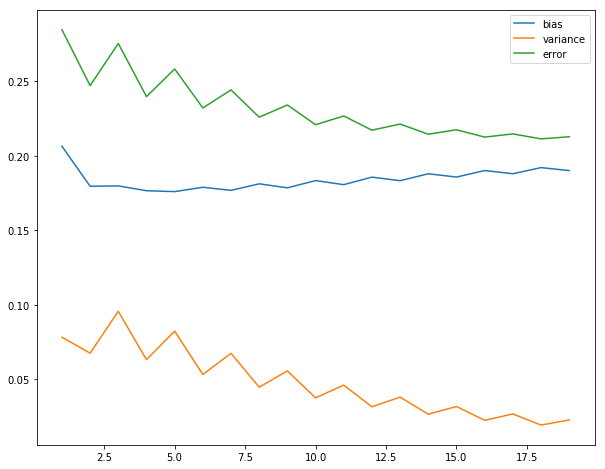

In [89]:
# Для каждого значения парамера оцените значение error, bias и variance согласно следующей схеме
p_name ='k'
bias_variance_df = pd.DataFrame.from_dict({p_name:parameters[p_name],'bias':list([np.NaN]*len(parameters[p_name]))
                                           , 'variance':list([np.NaN]*len(parameters[p_name]))
                                           , 'error':list([np.NaN]*len(parameters[p_name]))})
for parameter in parameters[p_name]:
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator = KNeighborsClassifier(n_neighbors=parameter)
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error

    y_error = np.mean((y_test.reshape(y_test.shape[0], 1) - y_predict)**2, axis=1)


    # В каждой точке тестовой выборки bias положим равным квадрату разности реального значения 
    # и среднего предсказанного значения по всем обучающим выборкам.
    y_bias = (y_test - np.mean(y_predict, axis=1)) ** 2
    
    # Variance положим равным среднеквадратичному разбросу значений по всем обучающим выборкам. 
    # Итоговое значение bias и variance возьмём равным среднему по всем точкам тестовой выборки
    y_var = np.var(y_predict, axis=1)
    
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'bias'] = np.mean(y_bias)
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'variance'] = np.mean(y_var)
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'error'] = np.mean(y_error)
    
# нарисуйте зависимость bias, variance и error от значений параметров
plt.figure(figsize=(10, 8))
plt.plot(bias_variance_df[p_name], bias_variance_df['bias'], label='bias')
plt.plot(bias_variance_df[p_name], bias_variance_df['variance'], label='variance')
plt.plot(bias_variance_df[p_name], bias_variance_df['error'], label='error')
plt.legend()
plt.show()

**Для различного параматра l_train**

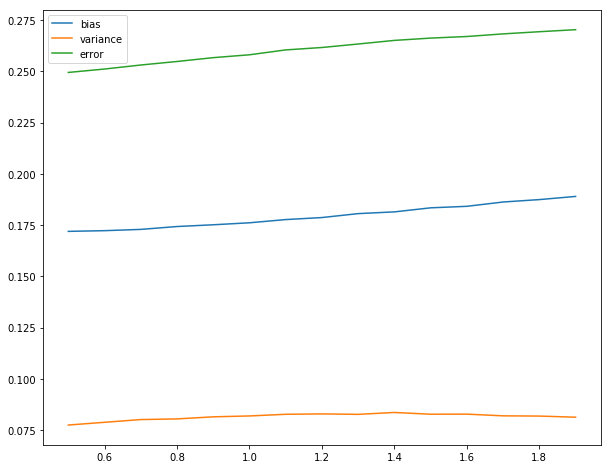

In [93]:
X_train = []
y_train = []
for i in range(n_repeat):
    indeces =  np.random.choice(np.arange(len(train)), size=len(train), replace=True)
    sample_train = train[indeces]
    X = sample_train[:,1:]
    y = sample_train[:,0]
    X_train.append(X)
    y_train.append(y)

# Для каждого значения парамера оцените значение error, bias и variance согласно следующей схеме
p_name ='l_train'
bias_variance_df = pd.DataFrame.from_dict({p_name:parameters[p_name],'bias':list([np.NaN]*len(parameters[p_name]))
                                           , 'variance':list([np.NaN]*len(parameters[p_name]))
                                           , 'error':list([np.NaN]*len(parameters[p_name]))})
for parameter in parameters[p_name]:
    y_predict = np.zeros((n_test, n_repeat))
    X_train = []
    y_train = []
    for i in range(n_repeat):
        indeces =  np.random.choice(np.arange(len(train)), size=int(parameter*len(test)), replace=True)
        sample_train = train[indeces]
        X = sample_train[:,1:]
        y = sample_train[:,0]
        X_train.append(X)
        y_train.append(y)

    for i in range(n_repeat):
        estimator = KNeighborsClassifier()
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.mean((y_test.reshape(y_test.shape[0], 1) - y_predict)**2, axis=1)


    # В каждой точке тестовой выборки bias положим равным квадрату разности реального значения 
    # и среднего предсказанного значения по всем обучающим выборкам.
    y_bias = (y_test - np.mean(y_predict, axis=1)) ** 2
    
    # Variance положим равным среднеквадратичному разбросу значений по всем обучающим выборкам. 
    # Итоговое значение bias и variance возьмём равным среднему по всем точкам тестовой выборки
    y_var = np.var(y_predict, axis=1)
    
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'bias'] = np.mean(y_bias)
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'variance'] = np.mean(y_var)
    bias_variance_df.loc[bias_variance_df[p_name]==parameter, 'error'] = np.mean(y_error)
    
# нарисуйте зависимость bias, variance и error от значений параметров
plt.figure(figsize=(10, 8))
plt.plot(bias_variance_df[p_name], bias_variance_df['bias'], label='bias')
plt.plot(bias_variance_df[p_name], bias_variance_df['variance'], label='variance')
plt.plot(bias_variance_df[p_name], bias_variance_df['error'], label='error')
plt.legend()
plt.show()

Как видим на всех трех графиках, при сложении bias и variance мы получаем приблизительно error, что как раз и говорит нам о правильности полученного bias-variance decomposition.

## Задача 2
## Реализуйте kNN (2 балла)

In [204]:
import warnings
import numpy as np

warnings.simplefilter("ignore")


class kNNClassifier():
    def __init__(self, n_estimators, metric):
        """
        Parameters
        ----------
        n_neighbours: int
            Число соседей

        metric: *alias
            метрика измерения расстояний

          """
        self.n_neighbours = n_estimators
        self.metric = metric
        
    def fit(self, X, y):
        """
        
        Parameters
        ----------
        X: 2d np.array
        y: 1d np.array
        """

        # Тут храните описание объектов обучающей выборки
        self.X_learn = X

        # Тут храните ответы по каждому объекту обучающей выборки
        self.y_learn = y

        return self

    def predict(self, X):
        """

        Parameters
        ----------
        X: 2d np.array матрица объекты признаки на которых нужно сказать ответ

        Returns
        -------
        y_pred: 1d np.array, вектор классов для каждого объекта
        """
        
        dist = []  # Храните тут расстояния до каждого элемента обучающей выборки 
        
        for i, x_test in enumerate(X):
            # =======================================
            # рассчитайте расстояние до каждого объекта обучающей выборки
            
            dist.append(self.metric(self.X_learn, x_test).ravel())

        dist = np.array(dist)

        # =======================================
        # предскажите класс каждого из объектов
        # =======================================
        k_neighbours = np.argsort(dist, axis=1)[:,:self.n_neighbours]
        
        #возвращаем самые встречаемые классы (рассматриваем столбец меток).
        # получим вектор из true и false - принадлежит ли объект классу 1
        y_pred = np.mean(self.y_learn[k_neighbours], axis=-1) > 0.5
        y_pred[y_pred == False] = 0
        y_pred[y_pred == True] = 1
        
        return y_pred

Проверять работу алгоритма будем на данных с категориальными признаками - ранее они были преобразованы в набор бинарных признаков. <br>
Сохраним в отдельную переменную результат X_train[0] и y_train[0], так как это одна из выборок, на которой будем смотреть точность алгоритма. (Нужно заново сгенерировать, так как добавили категориальные признаки)

In [189]:
train , test = train_test_split(data, test_size=test_size, random_state=0)

indeces =  np.random.choice(np.arange(len(train)), size=len(train), replace=True)
sample_train = train[indeces]
X_train_0 = np.hstack((sample_train[:,:103], sample_train[:,104:]))
y_train_0 = sample_train[:,103]


Запустим алгоритм при **k=3**

In [205]:
# Запустите ваш алгоритм на данных http://archive.ics.uci.edu/ml/machine-learning-databases/adult
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import euclidean_distances

# =======================================
# Обучите классификатор при k=3, 5, и 10
# =======================================


X_train, X_test, y_train, y_test = train_test_split(np.hstack((data[:,:103], data[:,104:])), data[:,103], test_size=0.3, random_state=0)

clf = kNNClassifier(n_estimators=3, metric=euclidean_distances)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print (accuracy_score(clf.predict(X_train_0), y_train_0), '\n' , accuracy_score(y_predict, y_test))

0.8686117936117936 
 0.7600573241887604


Теперь посмотрим на результат при **k=5**

In [206]:
clf = kNNClassifier(n_estimators=5, metric=euclidean_distances)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print (accuracy_score(clf.predict(X_train_0), y_train_0),'\n' , accuracy_score(y_predict, y_test))

0.8358722358722359 
 0.7718292558091924


Наконец, при **k=10**

In [207]:
clf = kNNClassifier(n_estimators=10, metric=euclidean_distances)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print(accuracy_score(clf.predict(X_train_0), y_train_0))
print(accuracy_score(y_predict, y_test))

0.8167076167076167
0.7939400143310472


Как видим, при разных k мы получили примерно одинаковую точность, то есть при маленьких k здесь переобучения мы не наблюдаем(однако это также может зависеть и от выбора тестовых выборки). Посмотрим на резульаты алгоритма при k = 1000

In [215]:
clf = kNNClassifier(n_estimators=1000, metric=euclidean_distances)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print(accuracy_score(clf.predict(X_train_0), y_train_0))
print(accuracy_score(y_predict, y_test))


0.7665233415233416
0.7601596888115467


Как видим, результат получился значительно хуже, что говорит нам о том, что уже при k = 1000 имеет место переобучение.

## Отбор признаков(3 балла)

Реализуйте алгоритм отбора признаков ADD_DELL и примените его для kNN на данных sklearn.datasets.digits(). Для этого предлагается реализовать следующие функции

In [163]:
# обновление минимального значения ошибки
def update_Q_min_index(estimator, Q_min, Q_min_set, Q_min_index, feature_set, X_train, Y_train, X_test, Y_test, update_equal=False):
    feature_set_size = len(feature_set)
    estimator.fit(X_train[:, feature_set], Y_train)
    error = 1 - accuracy_score(Y_test, estimator.predict(X_test[:, feature_set]))
    if error < Q_min[feature_set_size]:
        Q_min_set[feature_set_size] = feature_set
        Q_min[feature_set_size] = error
        if ((Q_min[feature_set_size] < Q_min[Q_min_index])
                or (update_equal and Q_min[feature_set_size] == Q_min[Q_min_index])):
            Q_min_index = feature_set_size
    return Q_min_index


# Нужно реализовать алгоритм добавление
def add_one(estimator, feature_set, X_train, Y_train, X_test, Y_test, look_forward=10, start_feature_set=[]):
    Q_min = {0: float('+inf')}
    Q_min_set = {0: []}
    Q_min_index = 0
    
    # инициализация стартового набора признаков     
    if start_feature_set:
        estimator.fit(X_train[:, feature_set], Y_train)
        error = 1 - accuracy_score(Y_test, estimator.predict(X_test[:, feature_set]))
        Q_min = {len(start_feature_set) : error}
        Q_min_set = {len(start_feature_set) : start_feature_set}
        Q_min_index = len(start_feature_set)
    
    # добавление признаков     
    for feature_set_size in range(len(start_feature_set) + 1, len(feature_set) + 1):
        Q_min[feature_set_size] = float('+inf')
        unused_features = set(feature_set).difference(set(Q_min_set[feature_set_size - 1]))
        unused_features = list(unused_features)
        #shuffle(unused_features)
        for feature in unused_features:
            new_feature_set = Q_min_set[feature_set_size - 1] + [feature]
            Q_min_index = update_Q_min_index(estimator, Q_min, Q_min_set, Q_min_index, new_feature_set, X_train, Y_train, X_test, Y_test, update_equal=True)
        
        print ('Q_min: %.4lf, set_size: %d, added: %s' % (Q_min[feature_set_size], feature_set_size, Q_min_set[feature_set_size][-1]))        
    
    # критерий останова
        if Q_min_index + look_forward <= feature_set_size:
            break
    return Q_min_set[Q_min_index]

def del_one(estimator, feature_set, X_train, Y_train, X_test, Y_test, look_forward=10):
    
#     инициализация
    estimator.fit(X_train[:, feature_set], Y_train)
    error = 1 - accuracy_score(Y_test, estimator.predict(X_test[:, feature_set]))
    Q_min = {len(feature_set): error}
    Q_min_set = {len(feature_set): deepcopy(feature_set)}
    Q_min_index = len(feature_set)
    
#     итерационное удаление признаков
    for feature_set_size in list(range(len(feature_set) - 1, 0, -1)):
        Q_min[feature_set_size] = float('+inf')
        features = copy(Q_min_set[feature_set_size + 1])
        # shuffle(features)
        for feature in features:
            index_feature = features.index(feature)
            new_feature_set = features[:index_feature] + features[index_feature+1:]
            Q_min_index = update_Q_min_index(estimator, Q_min, Q_min_set, Q_min_index, new_feature_set, X_train, Y_train, X_test, Y_test)
            
        print ('Q_min: %.4lf, set_size: %d, deleted: %s' % (Q_min[feature_set_size], feature_set_size,
            set(Q_min_set[feature_set_size + 1]).difference(set(Q_min_set[feature_set_size])),
        ))
        
#         критерий останова
        if feature_set_size + look_forward <= Q_min_index:
            break
    return Q_min_set[Q_min_index]

# Наконец, реализуйте ADD-DELL
def add_del(estimator, feature_set, X_train, Y_train, X_test, Y_test, look_forward=10):
    Q_min = None
    Q_min_current = float('+inf')
    start_feature_set = []
    
#     количество итераций, приведших к увеличению ошибки
    bad_iteration_count = 2
    
    while (Q_min is None) or (Q_min_current < Q_min or bad_iteration_count):
        Q_min = Q_min_current
        start_feature_set = add_one(estimator, feature_set, X_train, Y_train, X_test, Y_test, look_forward, start_feature_set=start_feature_set)
        start_feature_set = del_one(estimator, start_feature_set, X_train, Y_train, X_test, Y_test, look_forward)
        estimator.fit(X_train[:, start_feature_set], Y_train)
        Q_min_current = 1 - accuracy_score(Y_test, estimator.predict(X_test[:, start_feature_set]))
        
        if Q_min_current >= Q_min:
            bad_iteration_count -= 1
        print ('Q_min: %.4lf, set_size: %d' % (Q_min_current, len(start_feature_set)))
    return start_feature_set

Скачаем датасет и посмотрим на его признаки и метки

In [162]:
from sklearn.datasets import load_digits
from copy import deepcopy, copy
digits = load_digits()
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


Теперь запустим алгоритм ADD-DELL

In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1)

# проверьте вашу реализацию
estimator = KNeighborsClassifier()
%time feature_set = add_del(estimator, list(range(X_train.shape[1])), X_train, Y_train, X_test, Y_test, look_forward=4)
%time accuracy_score(Y_test, estimator.fit(X_train[:, feature_set], Y_train).predict(X_test[:, feature_set]))

Q_min: 0.7444, set_size: 1, added: 58
Q_min: 0.5944, set_size: 2, added: 61
Q_min: 0.4648, set_size: 3, added: 28
Q_min: 0.3556, set_size: 4, added: 29
Q_min: 0.2667, set_size: 5, added: 43
Q_min: 0.1889, set_size: 6, added: 27
Q_min: 0.1519, set_size: 7, added: 21
Q_min: 0.1204, set_size: 8, added: 33
Q_min: 0.0963, set_size: 9, added: 42
Q_min: 0.0704, set_size: 10, added: 12
Q_min: 0.0593, set_size: 11, added: 18
Q_min: 0.0537, set_size: 12, added: 59
Q_min: 0.0426, set_size: 13, added: 20
Q_min: 0.0352, set_size: 14, added: 38
Q_min: 0.0296, set_size: 15, added: 4
Q_min: 0.0259, set_size: 16, added: 46
Q_min: 0.0241, set_size: 17, added: 5
Q_min: 0.0167, set_size: 18, added: 26
Q_min: 0.0148, set_size: 19, added: 19
Q_min: 0.0148, set_size: 20, added: 0
Q_min: 0.0148, set_size: 21, added: 1
Q_min: 0.0148, set_size: 22, added: 2
Q_min: 0.0148, set_size: 23, added: 7
Q_min: 0.0148, set_size: 24, added: 8
Q_min: 0.0148, set_size: 25, added: 9
Q_min: 0.0130, set_size: 26, added: 25
Q_m

0.9944444444444445

Получили очень хороший результат. А какой же результат модели, обученной на всех признаках?

In [220]:
estimator = KNeighborsClassifier()
accuracy_score(Y_test, estimator.fit(X_train, Y_train).predict(X_test))

0.9907407407407407

Как видим, он действительно чуть хуже. Однако разница совсем небольшая, что связано с тем, что digits игрушечный dataset, в котором и так, и так объекты довольно хорошо разделяются на классы.